<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_06_%EC%82%B0%EC%A0%90%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.06. 산점도

---
* 날짜:
* 이름:


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)
plt.show()
```

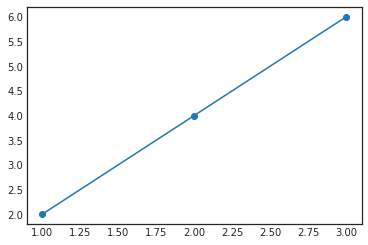

In [ ]:
x = [1,2,3]  # 문자형도 가능. 여러가지 그래프를 그려보면서 파악해보기.
y = [2,4,6]
plt.scatter(x, y)  # 선그래프와 비슷함(좌표값 x,y)
plt.plot(x,y)
plt.show() # 선그래프와 산점도 따로 그려진것임.

#### | 옵션

```
plt.scatter(x, y, 
            s=None, # 마커 크기 - x, y 길이와 동일
            c=None, # 색깔 - x, y의 길이와 동일 
            marker=None # 마커 종류
            cmap=None, # 컬러맵
            norm=None, # 정규화 여부
            alpha=None, # 투명도
            linewidths=None, # 테두리 두께
            edgecolors=None) # 테두리 색깔 - 기본 'face'
```

In [ ]:
plt.scatter(x, y, 
            s=, # 마커 크기 - x, y 길이와 동일
            c=None, # 색깔 - x, y의 길이와 동일 
            marker=None # 마커 종류
            cmap=None, # 컬러맵
            norm=None, # 정규화 여부
            alpha=None, # 투명도
            linewidths=None, # 테두리 두께
            edgecolors=None) # 테두리 색깔 - 기본 'face'

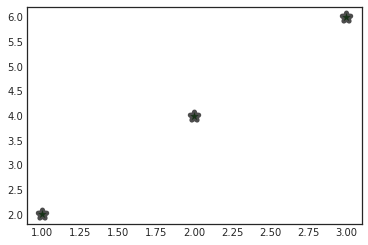

In [ ]:
plt.scatter(x, y,
            s=80,
            c='green',
            marker='*',
            cmap='Blues',
            norm=True,
            alpha=0.7,
            linewidths=5,
            edgecolors='k')

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.scatterplot(x=x,y=y)
```

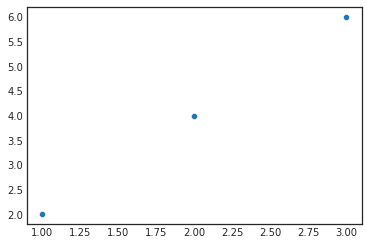

In [ ]:
sns.scatterplot(x=x,y=y)

#### | 옵션

```
seaborn.scatterplot(x=None, y=None, 
                    style=None, # 마커 스타일 리스트
                    palette=None, # 컬러맵
                    alpha=None, # 투명도 
                    legend='auto' # 각주위치 {auto, brief, full, False}) 
                    
```

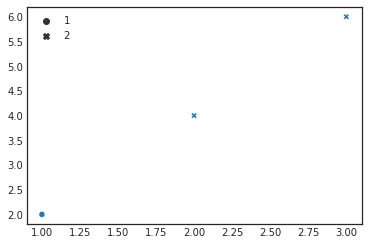

In [ ]:
sns.scatterplot(x=x, y=y,
                style=[1,2,2]) #마커의 스타일을 각각 다르게 설정

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.



In [ ]:
df=pd.DataFrame([x,y], ['x','y']).T
df

,x,y
0,1,2
1,2,4
2,3,6


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.scatter(x=x, y=y)
```




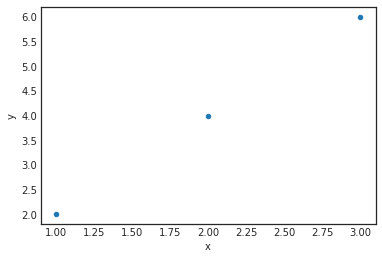

In [ ]:
df.plot.scatter(x='x', y='y')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.scatterplot(data=df, x=x, y=y)
```


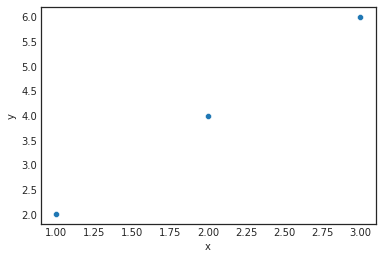

In [ ]:
sns.scatterplot(data=df, x='x', y='y')


##  **실습** 
---



### (1) 데이터에 따른 크기 및 색깔 지정

```
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)
```

In [ ]:
n = 50
np.random.seed(42) # 시드지정
x = np.random.rand(n) # 균등분포
y = np.random.rand(n)
x.shape, y.shape

((50,), (50,))

<function matplotlib.pyplot.show>

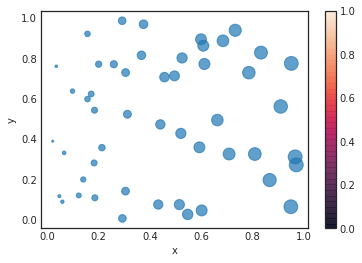

In [ ]:
plt.scatter(x,y,
             # x,y 배열의 길이와 똑같아야함. x는 x에 따라서, y는 y에 따라서 x*y는 대각선으로
            s=x*200,
            alpha=0.7,
            cmap='rainbow' # 컬러맵
            )
plt.colorbar()
plt.xlabel('x') # x축 이름
plt.ylabel('y') # y축 이름
plt.show

### (2) 산점도를 이용한 아이리스 데이터 시각화



```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

x_data = iris.data
print('x_data',x_data.shape)
y_data = iris.target
print('y_data',y_data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x_data (150, 4)
y_data (150,)


<function matplotlib.pyplot.show>

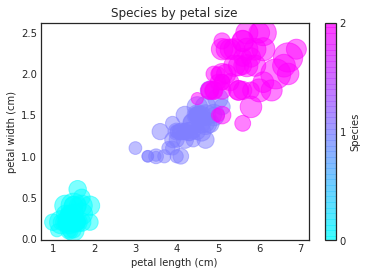

In [ ]:
plt.scatter(x_data[:,2], x_data[:,3],
            c=y_data,
            cmap='cool',  # cmap=plt.cm.get_cmap('스타일이름',n) n=가져올 색 개수.
            s=(x_data[:,0]*x_data[:,1])**2,
            alpha=0.5)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Species by petal size')
plt.colorbar(ticks=[0,1,2], label='Species')
#plt.clim(-0.5,2.5)
plt.show


##  **과제** 
---


### (1) 산점도를 이용한 캘리포니아 집값 시각화

* 아래와 같은 산점도를 그리세요.
  * `/content/sample_data/california_housing_test.csv`을 불러오세요.
  * `x`축은 `latitude` 입니다.
  * `y`축은 `longitude` 입니다.
  * 점의 크기는 `population`에 비례합니다.
  * `median_house_value`로 색깔을 나타내고 `colorbar`를 추가합니다.
* 색과 마커, 비례 정도 등 세세한 부분은 각자의 스타일로 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0205-01.png?raw=true)

In [3]:
df1=pd.read_csv('/content/sample_data/california_housing_test.csv')
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [4]:
xd = df1.iloc[:,1]
yd = df1.iloc[:,0]
zd = df1.iloc[:,5]
hv = df1.iloc[:,8]

<function matplotlib.pyplot.show>

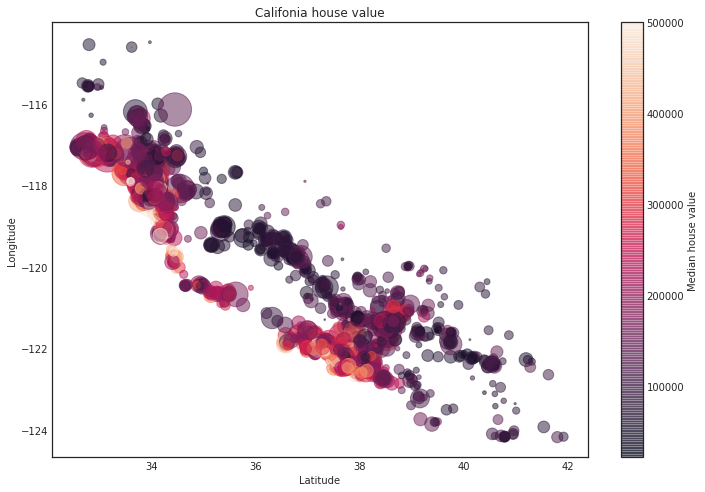

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(xd,yd,
            c=hv,
            s=zd/10,
            alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Califonia house value')
plt.colorbar(label='Median house value')
plt.show